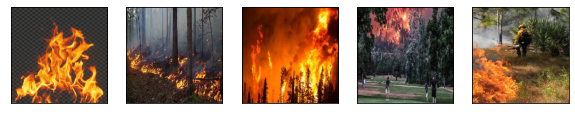

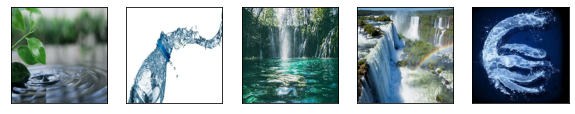

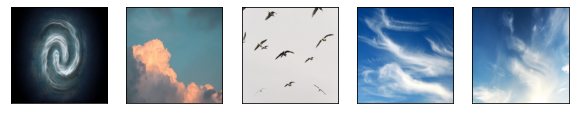

In [91]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_images_from_path(path, label): # generic load image en label op basis van map naam
    images = []
    labels = []

    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
        
    return images, labels

def show_images(images): # generic show image voor dit model
    fig, axes = plt.subplots(1, 5, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

## setup training and testing images ##

x = []
y = []

images, labels = load_images_from_path('datasets/elements/fire', 0)
show_images(images)
x += images
y += labels

images, labels = load_images_from_path('datasets/elements/water', 1)
show_images(images)
x += images
y += labels

images, labels = load_images_from_path('datasets/elements/air', 2)
show_images(images)
x += images
y += labels

# images, labels = load_images_from_path('datasets/elements/earth', 3)
# show_images(images)
# x += images
# y += labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # split 20% of the training images off for testing

Epoch 1/10
3/3 [==============================] - 2s 413ms/step - loss: 1.1033 - accuracy: 0.2083 - val_loss: 1.1100 - val_accuracy: 0.1667
Epoch 2/10
3/3 [==============================] - 1s 340ms/step - loss: 1.0989 - accuracy: 0.3750 - val_loss: 1.1132 - val_accuracy: 0.1667
Epoch 3/10
3/3 [==============================] - 1s 349ms/step - loss: 1.0981 - accuracy: 0.3750 - val_loss: 1.1088 - val_accuracy: 0.1667
Epoch 4/10
3/3 [==============================] - 1s 344ms/step - loss: 1.0983 - accuracy: 0.2500 - val_loss: 1.1146 - val_accuracy: 0.1667
Epoch 5/10
3/3 [==============================] - 1s 339ms/step - loss: 1.1004 - accuracy: 0.3750 - val_loss: 1.1267 - val_accuracy: 0.1667
Epoch 6/10
3/3 [==============================] - 1s 345ms/step - loss: 1.0950 - accuracy: 0.3750 - val_loss: 1.1176 - val_accuracy: 0.1667
Epoch 7/10
3/3 [==============================] - 1s 350ms/step - loss: 1.0958 - accuracy: 0.3750 - val_loss: 1.1159 - val_accuracy: 0.1667
Epoch 8/10
3/3 [====

[]

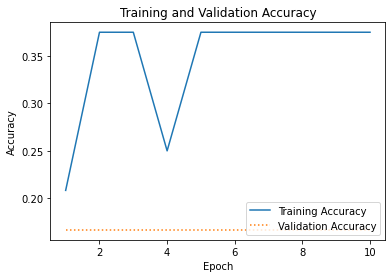

In [97]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

## preprocess images ##

from tensorflow.keras.utils import to_categorical

x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train, 3)
y_test_encoded = to_categorical(y_test, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train_encoded, validation_data=(x_test, y_test_encoded), batch_size=10, epochs=10)

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

IndexError: list index out of range

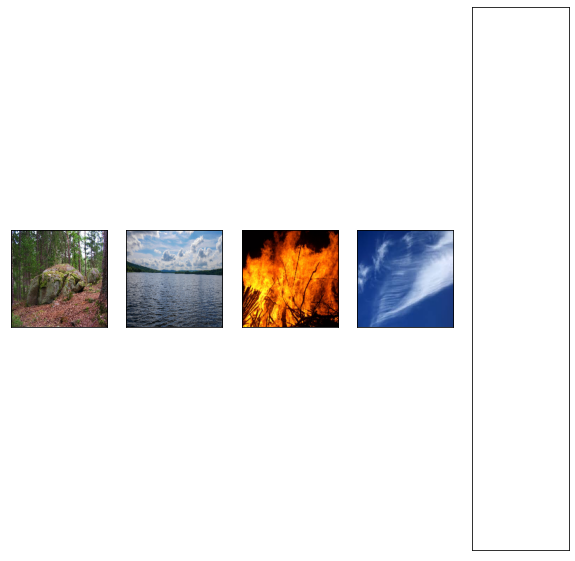

In [96]:
# get test image and predict #

import random

testimages, labels = load_images_from_path('datasets/elements_testing', 'answers')

test_image = testimages[random.randrange(0, len(os.listdir('datasets/elements_testing'))-1)]

predicted_class = np.argmax(model.predict(test_image), axis=-1)[0]
# print('Looks like a ' + str(predicted_class) + '!')